# UAS PEMBELAJARAN MESIN

## Kelompok 2

### Anggota Kelompok
- Amelia Marshanda S. / 2041720041
- Annisa Fitri Yuliandra / 2041720123
- Inda Khoirun Nisak / 2041720020
- Jasmin Salsabila Arifah / 2041720097
- Rofika Nur `Aini / 2041720099



**SOAL**

Pada proyek tugas besar ini, Anda diminta untuk membuat model pembelajaran mesin untuk kasus sentimen analisis menggunakan data dari twitter. Ketentuan dari proyek adalah sebagai berikut, 
 
1.	Lakukan scrapping data twitter pada akun College Menfest (@collegemenfess) sejumlah 5000 twit. Anda dapat menggunakan library Twint atau API resmi dari twitter. (15 poin) 
 
2.	Buatlah model clustering berdasarkan data tersebut. Jumlah cluster adalah 3 yang mewakili 3 sentimen, yaitu, positif, netral, dan negatif. Evaluasi model yang Anda buat. (30 poin) 
 
3.	Setelah cluster didapatkan, lakukan proses labeling terhadap cluster yang dihasilkan sesuai dengan sentiment yang ditentukan. Pada proses ini Anda dapat melakukannya dengan metode expert judgement atau asumsi kelompok. 
(10 poin) 
 
4.	Setelah proses labeling dilakukan, buatlah model klasifikasi dengan menggunakan data yang sudah Anda beri label. Evaluasi model yang Anda buat (akurasi dan presisi). (30 poin) 
 
5.	Lakukan prediksi sentimen data twitter yang baru (500 twit). Evaluasi akurasi dari model berdasarkan data baru. 
(15 poin)

# 1. Data Scrapping

In [ ]:
# Install Package
%pip install twint
%pip install nest_asyncio

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

# inisiasi obyek
c = twint.Config()

# config scrap
c.Username = "collegemenfess"
c.Since = "2022-12-05"
c.Until = "2022-12-11"
c.Limit = 5000
c.Store_csv = True
c.Output = "colle_scrap.csv"

# run scrap
twint.run.Search(c)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data scrapping
df = pd.read_csv('./drive/MyDrive/UAS/colle_scrap.csv')

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1601728382596964352,1601728382596964352,2022-12-11 06:59:39 SE Asia Standard Time,2022-12-11,06:59:39,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1601727590469111808,1601727590469111808,2022-12-11 06:56:30 SE Asia Standard Time,2022-12-11,06:56:30,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1601726312796033024,1601726312796033024,2022-12-11 06:51:26 SE Asia Standard Time,2022-12-11,06:51:26,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1601726216561491968,1601726216561491968,2022-12-11 06:51:03 SE Asia Standard Time,2022-12-11,06:51:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1601725424429453313,1601725424429453313,2022-12-11 06:47:54 SE Asia Standard Time,2022-12-11,06:47:54,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# 2.1 Preposesing

## Slicing Data

In [ ]:
# Mengecek berapa language yang terdapat pada tweet untuk stopwords
df.language.value_counts()

in     4947
en       25
tl        8
und       4
tr        2
es        2
eu        2
qme       1
lt        1
it        1
qst       1
pt        1
ja        1
da        1
et        1
ro        1
zxx       1
Name: language, dtype: int64

In [ ]:
# slice data
df = df.iloc[:,10:12]

# dibutuhkannya data kolom tweet dan language untuk stopword (terdapat 2 bahasa yang ditentukan di atas, yaitu bahasa 'in' dan 'en')
df.head()

,tweet,language
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in
1,[cm] tolong infonya ya makasih guys https://t...,in
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in
3,Besok aku praktik pertama kalinya di rumah sak...,in
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in


## Cek Data

In [ ]:
# mengecek baris dan kolom
df.shape

(5000, 2)

In [ ]:
# mengecek data null dangan info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     5000 non-null   object
 1   language  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [ ]:
# mengecek jumlah data null dengan isnull()
df.isnull().sum()

tweet       0
language    0
dtype: int64

## Lowercase

In [ ]:
# lowercase
df['tweet'] = df.tweet.str.lower()
df.head()

,tweet,language
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in
1,[cm] tolong infonya ya makasih guys https://t...,in
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in
3,besok aku praktik pertama kalinya di rumah sak...,in
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in


## Cek Duplikasi

In [ ]:
# cek duplikasi
print(df[df.duplicated(subset='tweet')])
print(df[df.duplicated(subset='tweet')].shape)

                                                  tweet language
686   [cm] di skripsi kuali itu harus ada mapping te...       in
909   [cm] ada yang belajar bahasa inggris di duolin...       in
1030  [cm] kalian kalau ditanya “kenapa ambil hubung...       in
1154  [cm] hai semua✨!  saat ini aku lagi ngadain su...       in
1167  [cm] ada yg lagi atau mau study with us (swu) ...       in
1228  [cm] gais ada ketentuannya ga si brp banyak ma...       in
1478  [cm] haloo, aku boleh minta tolong buat isiin ...       in
1564  [cm] ada yg pernah keyboard laptopnya rusak tr...       in
1578  [cm] kalo seandainya kalian anak accounting ba...       in
1824  [cm] bisa gak sih guys serahin berkas proposal...       in
1935  [cm] halo guys ada yang mau bantu aku ngisi ku...       in
1954  [cm] reposi univ mana aja gais yang bisa diaks...       in
2012  [cm] ada yg bersedia isi kuisioner penelitian ...       in
2019  [cm] kalimat mengusulkan hari bimbingan skrips...       in
2163  [cm] mau nanya dong

## Hapus Duplikasi

In [ ]:
# Pada tweet di atas, saat dilakukan pencarian data duplikasi terdapat beberapa kalimat yang terduplikasi. 
# Duplikasi di atas dapat diasumsikan sebagai data spam, yang kemungkinan user twitter mengirim spam agar dapat dimentions banyak orang.

# drop duplicate
df.drop_duplicates(subset='tweet',inplace=True)
df

,tweet,language
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in
1,[cm] tolong infonya ya makasih guys https://t...,in
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in
3,besok aku praktik pertama kalinya di rumah sak...,in
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in
...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in
4997,[cm] darurat tolong notice sender ini gimanaa ...,in
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in


In [ ]:
df.shape

(4969, 2)

## Replace dan Resub

In [ ]:
# Replace cm
df = df.copy()
df['tweet_clean'] = df['tweet']
df['tweet_clean'] = df['tweet_clean'].str.replace('cm', '')
df

,tweet,language,tweet_clean
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,[] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,in,[] tolong infonya ya makasih guys https://t.c...
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,[] gaiss ada yg tau cara nyari jumlah atau daf...
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan2!! tia [] htt...
...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,[] adakah kakak2 yang ambil konsentrasi sdm? a...
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,"[] di sepertiga malam ini, aku mau minta doany..."
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,[] darurat tolong notice sender ini gimanaa ya...
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,"[] gais, do's and don'ts kalo ke perpusnas don..."


In [ ]:
# clean data
import re
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    return text

df['tweet_clean'] = df.tweet_clean.apply(cleaningText)
df

,tweet,language,tweet_clean
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,[] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,in,[] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,[] gaiss ada yg tau cara nyari jumlah atau daf...
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan!! tia []
...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,[] adakah kakak yang ambil konsentrasi sdm? ak...
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,"[] di sepertiga malam ini, aku mau minta doany..."
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,[] darurat tolong notice sender ini gimanaa ya...
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,"[] gais, do's and don'ts kalo ke perpusnas don..."


In [ ]:
# clean data
# menghapus karakter khusus
df['tweet_clean'] = df['tweet_clean'].replace(regex='(@\w+)|#|&|!',value='')
rm_rt_url = lambda x: re.sub('(@[A-Za-z0-9\w|+]) | (@\w+:) | (\w+:\/\/\S+) | (www.\S+)',' ',x)
rm_punct = lambda x: re.sub('\W', ' ', x)
df['tweet_clean'] = df.tweet_clean.map(rm_rt_url).map(rm_punct)
df

,tweet,language,tweet_clean
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia
...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...


# 2.2 Filltering

In [ ]:
import nltk
# download all 

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# remove stopword
from nltk.corpus import stopwords

df_stem = df.copy()
languages = ['english',
             'indonesian',
            ]
stop = stopwords.words(languages)
df_stem['tweet_stopword'] = df_stem['tweet_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_stem

,tweet,language,tweet_clean,tweet_stopword
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia
...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...


# 2.3 Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_stem['tweet_lemma'] = df_stem['tweet_stopword'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia
...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...


# 2.4 Tokenizing

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_token = TweetTokenizer()
df_stem['tweet_token'] = df_stem['tweet_lemma'].apply(tweet_token.tokenize)

df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]"
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]"
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma..."
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun..."
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]"
...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka..."
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku..."
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,..."
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ..."


# 2.5 Vectorizer

## Token

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Menggunakan Tweet Token
tfidf_token = vectorizer.fit_transform(df_stem['tweet_token'].astype('U'))

In [ ]:
tfidf_token.shape

(4969, 9619)

## Lemma

In [ ]:
# Menggunakan Tweet Lemma
tfidf_lemma = vectorizer.fit_transform(df_stem['tweet_lemma'])

In [ ]:
tfidf_lemma.shape

(4969, 9662)

## 2.6 Clustering

### K-Means

#### TOKEN

In [ ]:
# dengan Tweet Token
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_token_kmeans = KMeans(n_clusters= 3)

# Fit model
cl_token_kmeans.fit(tfidf_token)

# Predict model
y_token_kmeans = cl_token_kmeans.predict(tfidf_token)

df_stem['label_token'] = y_token_kmeans

df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2
...,...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ...",2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


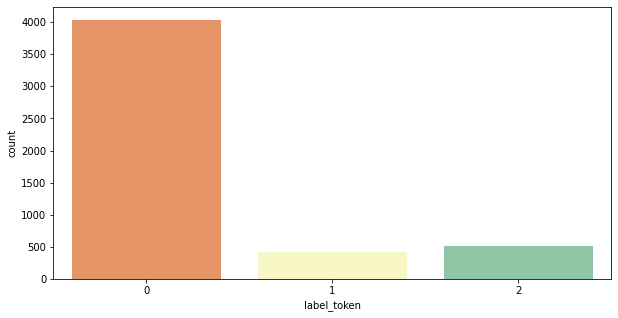

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(df_stem.label_token, palette='Spectral')

In [ ]:
df_stem.label_token.value_counts()

0    4033
2     519
1     417
Name: label_token, dtype: int64

#### LEMMA

In [ ]:
# dengan Tweet Lemma
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_lemma_kmeans = KMeans(n_clusters= 3)

# Fit model
cl_lemma_kmeans.fit(tfidf_lemma)

# Predict model
y_lemma_kmeans = cl_lemma_kmeans.predict(tfidf_lemma)

df_stem['label_lemma'] = y_lemma_kmeans

df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0
...,...,...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ...",2,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


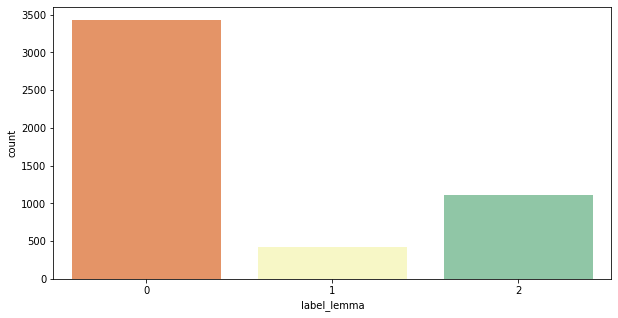

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df_stem.label_lemma, palette='Spectral')

In [ ]:
df_stem.label_lemma.value_counts()

0    3430
2    1112
1     427
Name: label_lemma, dtype: int64

### Polarity dengan tweet lemma

In [ ]:
# Import TextBlog Package
from textblob import TextBlob

# Membuat fungsi untuk menghitung polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df_stem['polarity_lemma'] = df_stem['tweet_lemma'].apply(get_polarity)

df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0
...,...,...,...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0,0.0
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0,0.0
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0,0.0
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ...",2,0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


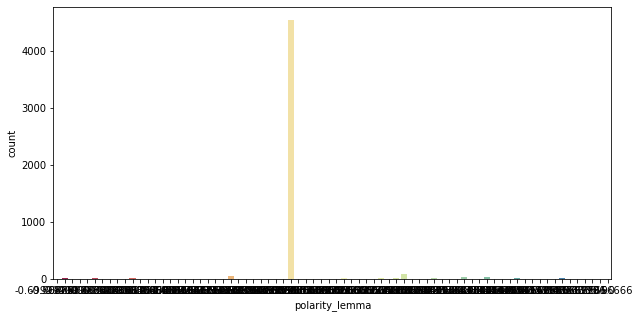

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df_stem.polarity_lemma, palette='Spectral')

In [ ]:
df_stem.polarity_lemma.value_counts()

 0.000000    4541
 0.200000      81
-0.100000      48
 0.350000      31
 0.300000      29
             ... 
 0.116667       1
 0.023810       1
 0.016667       1
 0.666667       1
-0.033333       1
Name: polarity_lemma, Length: 74, dtype: int64

# 3. Penentuan Sentiment

## Polarity dengan lemma

In [ ]:
# Skor polaritas terletak antara (-1 hingga 1) 
# di mana -1 mengidentifikasi kata-kata yang paling negatif seperti 'menjijikkan', 'mengerikan', 'menyedihkan', dan 
# 1 mengidentifikasi kata-kata yang paling positif seperti 'luar biasa', 'terbaik'. 
# Skor subjektivitas terletak antara (0 dan 1), Ini menunjukkan jumlah opini pribadi, 
# Jika sebuah kalimat memiliki subjektivitas tinggi yaitu mendekati 1, 
# Ini menyerupai teks yang berisi lebih banyak pendapat pribadi daripada informasi faktual.

def sentiment_polarity(p):
    if p>0:
        return "Positif"
    elif p==0:
        return "Neutral"
    else:
        return 'Negatif'

df_stem['sentiment_polarity'] = df_stem['polarity_lemma'].apply(sentiment_polarity)

df_stem.head()

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0,Neutral
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0,Neutral
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


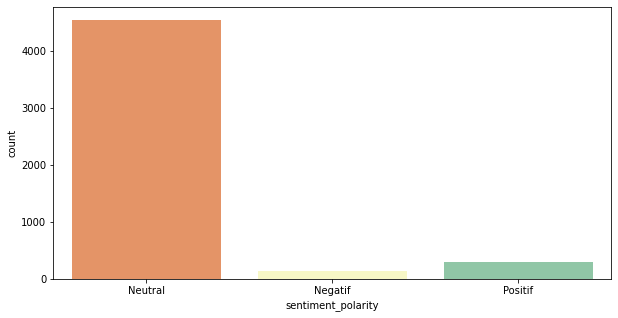

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df_stem.sentiment_polarity, palette='Spectral')

In [ ]:
df_stem.sentiment_polarity.value_counts()

Neutral    4541
Positif     293
Negatif     135
Name: sentiment_polarity, dtype: int64

## Prediksi sentimen token kmeans

In [ ]:
# mengecek label 0 pada token kmeans
df_stem[df_stem['label_token'] == 0]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0,Neutral
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0,Neutral
5,[cm] spek laptop gini buat anak arsi cukup gak...,in,spek laptop gini buat anak arsi cukup gak tia,spek laptop gini anak arsi gak tia,spek laptop gini anak arsi gak tia,"[spek, laptop, gini, anak, arsi, gak, tia]",0,0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
4993,[cm] udah sekitar dua jam lebih nge stuck di s...,in,udah sekitar dua jam lebih nge stuck di sit...,udah jam nge stuck situ mendingan cancel ngula...,udah jam nge stuck situ mendingan cancel ngula...,"[udah, jam, nge, stuck, situ, mendingan, cance...",0,0,0.0,Neutral
4994,[cm] guys dilandasan teori bab 2 kan harus min...,in,guys dilandasan teori bab kan harus min th...,guys dilandasan teori bab min thn cari definis...,guy dilandasan teori bab min thn cari definisi...,"[guy, dilandasan, teori, bab, min, thn, cari, ...",0,0,0.0,Neutral
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0,0.0,Neutral
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0,0.0,Neutral


In [ ]:
# mengecek label 1 pada token kmeans
df_stem[df_stem['label_token'] == 1]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity
49,makasi yg udh bantu jawab,in,makasi yg udh bantu jawab,makasi yg udh bantu,makasi yg udh bantu,"[makasi, yg, udh, bantu]",1,2,0.0,Neutral
64,[cm] halo temen2 ¡pb ada yg masih bangun gak y...,in,halo temen pb ada yg masih bangun gak yaa ...,halo temen pb yg bangun gak yaa tolong unlock ...,halo temen pb yg bangun gak yaa tolong unlock ...,"[halo, temen, pb, yg, bangun, gak, yaa, tolong...",1,2,0.0,Neutral
79,tapi masih kurang responden. link angketnya se...,in,tapi masih kurang responden link angketnya se...,responden link angketnya sender drop rep ya te...,responden link angketnya sender drop rep ya te...,"[responden, link, angketnya, sender, drop, rep...",1,1,0.0,Neutral
111,adakah mahasiswa jurusan teknik ataupun seni d...,in,adakah mahasiswa jurusan teknik ataupun seni d...,adakah mahasiswa jurusan teknik seni desain co...,adakah mahasiswa jurusan teknik seni desain co...,"[adakah, mahasiswa, jurusan, teknik, seni, des...",1,1,0.0,Neutral
120,[cm] ada yang mau bantu sender ngisi kuesioner...,in,ada yang mau bantu sender ngisi kuesioner g...,bantu sender ngisi kuesioner gform gaa masi bu...,bantu sender ngisi kuesioner gform gaa masi bu...,"[bantu, sender, ngisi, kuesioner, gform, gaa, ...",1,1,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
4834,"[cm] haloo, boleh minta tolong isiin kuesioner...",in,haloo boleh minta tolong isiin kuesioner ...,haloo tolong isiin kuesioner butuh bgt respond...,haloo tolong isiin kuesioner butuh bgt respond...,"[haloo, tolong, isiin, kuesioner, butuh, bgt, ...",1,1,0.0,Neutral
4838,"[cm] halo, disini ada yang mau bantu aku isi k...",in,halo disini ada yang mau bantu aku isi kue...,halo bantu isi kuesioner skripsi kriterianya o...,halo bantu isi kuesioner skripsi kriterianya o...,"[halo, bantu, isi, kuesioner, skripsi, kriteri...",1,1,0.0,Neutral
4867,[cm] halooo!! adakah disini yg bersedia isi ku...,in,halooo adakah disini yg bersedia isi kuesio...,halooo adakah yg bersedia isi kuesionerku krit...,halooo adakah yg bersedia isi kuesionerku krit...,"[halooo, adakah, yg, bersedia, isi, kuesionerk...",1,1,0.2,Positif
4873,[cm] teman-teman ada yg mau bantu like tugas y...,in,teman teman ada yg mau bantu like tugas you...,teman teman yg bantu like tugas youtube like s...,teman teman yg bantu like tugas youtube like s...,"[teman, teman, yg, bantu, like, tugas, youtube...",1,1,0.0,Neutral


In [ ]:
# mengecek label 2 pada token kmeans
df_stem[df_stem['label_token'] == 2]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral
12,[cm] sender baru aja nyelesain proposal sender...,in,sender baru aja nyelesain proposal sender d...,sender aja nyelesain proposal sender jd degan ...,sender aja nyelesain proposal sender jd degan ...,"[sender, aja, nyelesain, proposal, sender, jd,...",2,2,0.0,Neutral
22,"[cm] sender cape punya laptop mo0dyan, pas sen...",in,sender cape punya laptop modyan pas sender...,sender cape laptop modyan pas sender smgt nuga...,sender cape laptop modyan pa sender smgt nugas...,"[sender, cape, laptop, modyan, pa, sender, smg...",2,0,0.0,Neutral
23,"[cm] gais,sender butuh saran kalian. mending g...",in,gais sender butuh saran kalian mending gas...,gais sender butuh saran mending gas aja nyerah...,gais sender butuh saran mending gas aja nyerah...,"[gais, sender, butuh, saran, mending, gas, aja...",2,0,0.0,Neutral
48,"[cm] tadi sender wisuda, untung banget bekel c...",in,tadi sender wisuda untung banget bekel com...,sender wisuda untung banget bekel compact powd...,sender wisuda untung banget bekel compact powd...,"[sender, wisuda, untung, banget, bekel, compac...",2,0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
4949,[cm] sender lupa gimana cara ngecek typo di go...,in,sender lupa gimana cara ngecek typo di goog...,sender lupa gimana ngecek typo google doc kasi...,sender lupa gimana ngecek typo google doc kasi...,"[sender, lupa, gimana, ngecek, typo, google, d...",2,0,0.0,Neutral
4964,[cm] sender pejuang proposal gizi klinik huhuh...,in,sender pejuang proposal gizi klinik huhuhu ...,sender pejuang proposal gizi klinik huhuhu gak...,sender pejuang proposal gizi klinik huhuhu gak...,"[sender, pejuang, proposal, gizi, klinik, huhu...",2,0,0.0,Neutral
4976,[cm] menurut kalian tugas kelompok tuh efektif...,in,menurut kalian tugas kelompok tuh efektif g...,tugas kelompok tuh efektif gak sih sender nger...,tugas kelompok tuh efektif gak sih sender nger...,"[tugas, kelompok, tuh, efektif, gak, sih, send...",2,2,0.0,Neutral
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0,0.0,Neutral


In [ ]:
df_stem.label_token.value_counts()

0    4033
2     519
1     417
Name: label_token, dtype: int64

In [ ]:
# # kesimpulan sentiment tweet token:
# # label berjumlah 4000 an lebih cenderung neutral
# # label berjumlah 500 an lebih cenderung negatif
# # label berjumlah 400 an lebih cenderung positif

def sentiment_tweet_token(tt):
    if tt==2:
        return "Negatif"
    elif tt==0:
        return "Neutral"
    else:
        return 'Positif'

df_stem['sentiment_token'] = df_stem['label_token'].apply(sentiment_tweet_token)

df_stem.head()

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral,Neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0,Neutral,Neutral
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0,Neutral,Neutral
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral,Negatif


## Prediksi sentimen lemma kmeans

In [ ]:
# mengecek label 0 pada lemma kmeans
df_stem[df_stem['label_lemma'] == 0]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral,Neutral
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral,Negatif
5,[cm] spek laptop gini buat anak arsi cukup gak...,in,spek laptop gini buat anak arsi cukup gak tia,spek laptop gini anak arsi gak tia,spek laptop gini anak arsi gak tia,"[spek, laptop, gini, anak, arsi, gak, tia]",0,0,0.0,Neutral,Neutral
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,in,kira sopan gak ya ngechat dosbing hari ini ...,sopan gak ya ngechat dosbing konsultasi skrips...,sopan gak ya ngechat dosbing konsultasi skrips...,"[sopan, gak, ya, ngechat, dosbing, konsultasi,...",0,0,0.0,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0,0.0,Neutral,Neutral
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0,0.0,Neutral,Neutral
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0,0.0,Neutral,Negatif
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ...",2,0,0.0,Neutral,Negatif


In [ ]:
# mengecek label 1 pada lemma kmeans
df_stem[df_stem['label_lemma'] == 1]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token
79,tapi masih kurang responden. link angketnya se...,in,tapi masih kurang responden link angketnya se...,responden link angketnya sender drop rep ya te...,responden link angketnya sender drop rep ya te...,"[responden, link, angketnya, sender, drop, rep...",1,1,0.0,Neutral,Positif
111,adakah mahasiswa jurusan teknik ataupun seni d...,in,adakah mahasiswa jurusan teknik ataupun seni d...,adakah mahasiswa jurusan teknik seni desain co...,adakah mahasiswa jurusan teknik seni desain co...,"[adakah, mahasiswa, jurusan, teknik, seni, des...",1,1,0.0,Neutral,Positif
120,[cm] ada yang mau bantu sender ngisi kuesioner...,in,ada yang mau bantu sender ngisi kuesioner g...,bantu sender ngisi kuesioner gform gaa masi bu...,bantu sender ngisi kuesioner gform gaa masi bu...,"[bantu, sender, ngisi, kuesioner, gform, gaa, ...",1,1,0.0,Neutral,Positif
122,[cm] ada yang pernah magang disini? tolong rep...,in,ada yang pernah magang disini tolong reply...,magang tolong reply like yaa izin dm nanya nan...,magang tolong reply like yaa izin dm nanya nan...,"[magang, tolong, reply, like, yaa, izin, dm, n...",1,1,0.0,Neutral,Positif
228,[cm] ada yang mau isi kuisioner seputar pengal...,in,ada yang mau isi kuisioner seputar pengalam...,isi kuisioner seputar pengalaman belajar krite...,isi kuisioner seputar pengalaman belajar krite...,"[isi, kuisioner, seputar, pengalaman, belajar,...",1,1,0.0,Neutral,Positif
...,...,...,...,...,...,...,...,...,...,...,...
4836,"[cm] permisi gais, sender dapat tugas. apa ada...",in,permisi gais sender dapat tugas apa ada y...,permisi gais sender tugas bersedia membantu re...,permisi gais sender tugas bersedia membantu re...,"[permisi, gais, sender, tugas, bersedia, memba...",2,1,0.0,Neutral,Negatif
4838,"[cm] halo, disini ada yang mau bantu aku isi k...",in,halo disini ada yang mau bantu aku isi kue...,halo bantu isi kuesioner skripsi kriterianya o...,halo bantu isi kuesioner skripsi kriterianya o...,"[halo, bantu, isi, kuesioner, skripsi, kriteri...",1,1,0.0,Neutral,Positif
4867,[cm] halooo!! adakah disini yg bersedia isi ku...,in,halooo adakah disini yg bersedia isi kuesio...,halooo adakah yg bersedia isi kuesionerku krit...,halooo adakah yg bersedia isi kuesionerku krit...,"[halooo, adakah, yg, bersedia, isi, kuesionerk...",1,1,0.2,Positif,Positif
4873,[cm] teman-teman ada yg mau bantu like tugas y...,in,teman teman ada yg mau bantu like tugas you...,teman teman yg bantu like tugas youtube like s...,teman teman yg bantu like tugas youtube like s...,"[teman, teman, yg, bantu, like, tugas, youtube...",1,1,0.0,Neutral,Positif


In [ ]:
# mengecek label 2 pada lemma kmeans
df_stem[df_stem['label_lemma'] == 2]

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.00,Neutral,Neutral
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.00,Neutral,Neutral
8,[cm] ada mahasiswa magister akuntansi/ekonomi ...,in,ada mahasiswa magister akuntansi ekonomi ga...,mahasiswa magister akuntansi ekonomi gaaa espe...,mahasiswa magister akuntansi ekonomi gaaa espe...,"[mahasiswa, magister, akuntansi, ekonomi, gaaa...",0,2,0.00,Neutral,Neutral
9,[cm] gais kampus pendidikan yg terkenal di ind...,in,gais kampus pendidikan yg terkenal di indon...,gais kampus pendidikan yg terkenal indonesia u...,gais kampus pendidikan yg terkenal indonesia u...,"[gais, kampus, pendidikan, yg, terkenal, indon...",0,2,0.00,Neutral,Neutral
12,[cm] sender baru aja nyelesain proposal sender...,in,sender baru aja nyelesain proposal sender d...,sender aja nyelesain proposal sender jd degan ...,sender aja nyelesain proposal sender jd degan ...,"[sender, aja, nyelesain, proposal, sender, jd,...",2,2,0.00,Neutral,Negatif
...,...,...,...,...,...,...,...,...,...,...,...
4982,[cm] kalo nurunin tingkat plagiat turnitin har...,in,kalo nurunin tingkat plagiat turnitin harus...,kalo nurunin tingkat plagiat turnitin yg tanda...,kalo nurunin tingkat plagiat turnitin yg tanda...,"[kalo, nurunin, tingkat, plagiat, turnitin, yg...",0,2,0.00,Neutral,Neutral
4984,[cm] liat story temen ulang tahun banyak yg uc...,in,liat story temen ulang tahun banyak yg ucap...,liat story temen ulang yg ucapin dibikin story...,liat story temen ulang yg ucapin dibikin story...,"[liat, story, temen, ulang, yg, ucapin, dibiki...",0,2,0.00,Neutral,Neutral
4988,[cm] ada yg tau gak ini kenapa? udah 5 jam nun...,in,ada yg tau gak ini kenapa udah jam nunggu...,yg tau gak udah jam nunggu download annya gaga...,yg tau gak udah jam nunggu download annya gaga...,"[yg, tau, gak, udah, jam, nunggu, download, an...",0,2,0.00,Neutral,Neutral
4989,[cm] gais disini ada yg takut ktemu orang buat...,in,gais disini ada yg takut ktemu orang buat s...,gais yg takut ktemu orang sebar kuesioner gmn ...,gais yg takut ktemu orang sebar kuesioner gmn ...,"[gais, yg, takut, ktemu, orang, sebar, kuesion...",0,2,0.00,Neutral,Neutral


In [ ]:
df_stem.label_lemma.value_counts()

0    3430
2    1112
1     427
Name: label_lemma, dtype: int64

In [ ]:
# # kesimpulan sentiment tweet lemma:
# # label dengan jumlah 3000 an lebih cenderung neutral
# # label dengan jumlah 1000 an lebih cenderung negatif
# # label dengan jumlah 400 an lebih cenderung positif

def sentiment_tweet_lemma(tl):
    if tl==1:
        return "Positif"
    elif tl==0:
        return "Neutral"
    else:
        return 'Negatif'

df_stem['sentiment_lemma'] = df_stem['label_lemma'].apply(sentiment_tweet_lemma)

df_stem.head()

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token,sentiment_lemma
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral,Neutral,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral,Neutral,Neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0,Neutral,Neutral,Negatif
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0,Neutral,Neutral,Negatif
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral,Negatif,Neutral


In [ ]:
df_stem

,tweet,language,tweet_clean,tweet_stopword,tweet_lemma,tweet_token,label_token,label_lemma,polarity_lemma,sentiment_polarity,sentiment_token,sentiment_lemma
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,in,bisa ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,ga sih skripsi tuh diilangin aja,"[ga, sih, skripsi, tuh, diilangin, aja]",0,0,0.0,Neutral,Neutral,Neutral
1,[cm] tolong infonya ya makasih guys https://t...,in,tolong infonya ya makasih guys,tolong infonya ya makasih guys,tolong infonya ya makasih guy,"[tolong, infonya, ya, makasih, guy]",0,0,0.0,Neutral,Neutral,Neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,in,gaiss ada yg tau cara nyari jumlah atau daf...,gaiss yg tau nyari daftar perusahaan manufaktu...,gaiss yg tau nyari daftar perusahaan manufaktu...,"[gaiss, yg, tau, nyari, daftar, perusahaan, ma...",0,2,0.0,Neutral,Neutral,Negatif
3,besok aku praktik pertama kalinya di rumah sak...,in,besok aku praktik pertama kalinya di rumah sak...,besok praktik kalinya rumah sakit jantung degd...,besok praktik kalinya rumah sakit jantung degd...,"[besok, praktik, kalinya, rumah, sakit, jantun...",0,2,0.0,Neutral,Neutral,Negatif
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,in,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,ayooo bantu sender nyetok bahan tia,"[ayooo, bantu, sender, nyetok, bahan, tia]",2,0,0.0,Neutral,Negatif,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,[cm] adakah kakak2 yang ambil konsentrasi sdm?...,in,adakah kakak yang ambil konsentrasi sdm ak...,adakah kakak ambil konsentrasi sdm terkait pkwt,adakah kakak ambil konsentrasi sdm terkait pkwt,"[adakah, kakak, ambil, konsentrasi, sdm, terka...",0,0,0.0,Neutral,Neutral,Neutral
4996,"[cm] di sepertiga malam ini, aku mau minta doa...",in,di sepertiga malam ini aku mau minta doany...,sepertiga malam doanya ya biar artikelku publi...,sepertiga malam doanya ya biar artikelku publi...,"[sepertiga, malam, doanya, ya, biar, artikelku...",0,0,0.0,Neutral,Neutral,Neutral
4997,[cm] darurat tolong notice sender ini gimanaa ...,in,darurat tolong notice sender ini gimanaa ya...,darurat tolong notice sender gimanaa ya gaiss ...,darurat tolong notice sender gimanaa ya gaiss ...,"[darurat, tolong, notice, sender, gimanaa, ya,...",2,0,0.0,Neutral,Negatif,Neutral
4998,"[cm] gais, do's and don'ts kalo ke perpusnas d...",in,gais do s and don ts kalo ke perpusnas don...,gais ts kalo perpusnas dongg sender br kesana ...,gais t kalo perpusnas dongg sender br kesana p...,"[gais, t, kalo, perpusnas, dongg, sender, br, ...",2,0,0.0,Neutral,Negatif,Neutral


In [ ]:
# Pada hasil di atas, sentiment lemma menjadi sentiment paling rata diantara sentiment lain.
# Sentiment polarity menjadi sentiment paling spesifik.
# Sedangkan sentiment token menjadi sentiment yang lebih umum.

print('===================TOKEN=================\n')
print(df_stem.sentiment_token.value_counts())
print('==============LEMMATIZATION==============\n')
print(df_stem.sentiment_lemma.value_counts())
print('=================POLARITY================\n')
print(df_stem.sentiment_polarity.value_counts())

===================TOKEN=================

Neutral    4033
Negatif     519
Positif     417
Name: sentiment_token, dtype: int64
==============LEMMATIZATION==============

Neutral    3430
Negatif    1112
Positif     427
Name: sentiment_lemma, dtype: int64
=================POLARITY================

Neutral    4541
Positif     293
Negatif     135
Name: sentiment_polarity, dtype: int64


# 4. Modeling

In [ ]:
# ekstraksi fitur

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_stem['tweet_token'], df_stem['sentiment_lemma'], test_size=0.2, random_state=50)

In [ ]:
# TF IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_mnb_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_mnb_train = accuracy_score(y_train, y_mnb_pred_train)

# Prediksi dengan data training
y_mnb_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_mnb_test = accuracy_score(y_test, y_mnb_pred_test)

# Print hasil evaluasi
print(f'Hasil perhitungan akurasi Data Train : {acc_mnb_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_mnb_test}')

Hasil perhitungan akurasi Data Train : 0.7776100628930818
Hasil perhitungan akurasi Data Test  : 0.7434607645875252


In [ ]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_mnb_pred_test))

print(confusion_matrix(y_test, y_mnb_pred_test))

              precision    recall  f1-score   support

     Negatif       1.00      0.01      0.03       228
     Neutral       0.73      1.00      0.84       689
     Positif       0.98      0.61      0.75        77

    accuracy                           0.74       994
   macro avg       0.90      0.54      0.54       994
weighted avg       0.81      0.74      0.65       994

[[  3 224   1]
 [  0 689   0]
 [  0  30  47]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Initiate Model
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_gini = DecisionTreeClassifier(criterion='gini')

# Fit model
# Entropy
dt_entropy.fit(X_train, y_train)
y_pred_entropy_train = dt_entropy.predict(X_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Gini
dt_gini.fit(X_train, y_train)
y_pred_gini_train = dt_gini.predict(X_train)
y_pred_gini = dt_gini.predict(X_test)

# Evaluasi
# Entropy
acc_entropy_train = accuracy_score(y_train, y_pred_entropy_train)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Gini
acc_gini_train = accuracy_score(y_train, y_pred_gini_train)
acc_gini = accuracy_score(y_test, y_pred_gini)

print(f'Akurasi Entropy Train: {acc_entropy_train}')
print(f'Akurasi Entropy: {acc_entropy}')
print('\n')
print(f'Akurasi Gini Train: {acc_gini_train}')
print(f'Akurasi Gini: {acc_gini}')

Akurasi Entropy Train: 1.0
Akurasi Entropy: 0.9456740442655935


Akurasi Gini Train: 1.0
Akurasi Gini: 0.9305835010060363


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# max_depth = batas atas berapa kali, datanya baru boleh di split
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_dt_pred = dt.predict(X_test)

#  menghitung set accuracy
acc_accuracy_score = accuracy_score(y_test, y_dt_pred)
print("Test set accuracy: {:.2f}".format(acc_accuracy_score))

Test set accuracy: 0.94


# SVM

In [ ]:
# Model using Linear SVC

from sklearn.svm import LinearSVC

# Inisiasi LinearSVC
lsvc = LinearSVC()

# Fit model
lsvc.fit(X_train, y_train)

# Prediksi dengan data training
y_lin_pred_train = lsvc.predict(X_train)

# Evaluasi akurasi data training
acc_lin_train = accuracy_score(y_train, y_lin_pred_train)

# Prediksi dengan data training
y_lin_pred_test = lsvc.predict(X_test)

# Evaluasi akurasi data training
acc_lin_test = accuracy_score(y_test, y_lin_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_lin_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_lin_test}')

Hasil perhitungan akurasi Data Train : 1.0
Hasil perhitungan akurasi Data Test  : 0.9768611670020121


In [ ]:
# evaluation

print(classification_report(y_test, y_lin_pred_test))
print(confusion_matrix(y_test, y_lin_pred_test))

              precision    recall  f1-score   support

     Negatif       0.95      0.98      0.97       228
     Neutral       0.99      0.98      0.98       689
     Positif       0.95      0.95      0.95        77

    accuracy                           0.98       994
   macro avg       0.96      0.97      0.97       994
weighted avg       0.98      0.98      0.98       994

[[224   4   0]
 [ 11 674   4]
 [  1   3  73]]


## SVM RBF

In [ ]:
from sklearn.svm import SVC

# Inisiasi RBFSVC
rbf = SVC(kernel='rbf')

# Fit model
rbf.fit(X_train, y_train)

# Prediksi dengan data training
y_rbf_pred_train = rbf.predict(X_train)

# Evaluasi akurasi data training
acc_rbf_train = accuracy_score(y_train, y_rbf_pred_train)

# Prediksi dengan data training
y_rbf_pred_test = rbf.predict(X_test)

# Evaluasi akurasi data training
acc_rbf_test = accuracy_score(y_test, y_rbf_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_rbf_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_rbf_test}')

Hasil perhitungan akurasi Data Train : 1.0
Hasil perhitungan akurasi Data Test  : 0.9778672032193159


In [ ]:
# evaluation

print(classification_report(y_test, y_rbf_pred_test))
print(confusion_matrix(y_test, y_rbf_pred_test))

              precision    recall  f1-score   support

     Negatif       0.97      0.97      0.97       228
     Neutral       0.99      0.99      0.99       689
     Positif       0.95      0.92      0.93        77

    accuracy                           0.98       994
   macro avg       0.97      0.96      0.96       994
weighted avg       0.98      0.98      0.98       994

[[222   5   1]
 [  7 679   3]
 [  1   5  71]]


# Kesimpulan Model

Dari model evaluasi di atas, telah diperoleh untuk model SVM serta Decision Tree mendapat accuracy 93% sampai 100%. Akurasi terendah diperoleh oleh Naive Bayes dengan nilai 78%.
Akurasi terbaik adalah SVM RBF dengan nilai 97,7%

# 5. Prediksi dan Evaluasi Data Baru

In [ ]:
# load data scrapping terbaru
df_new = pd.read_csv('./drive/MyDrive/UAS/colle_scrap_new.csv')

df_new.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608251237748854784,1608251237748854784,2022-12-29 06:59:09 SE Asia Standard Time,2022-12-29,06:59:09,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608247740932427778,1608247740932427778,2022-12-29 06:45:15 SE Asia Standard Time,2022-12-29,06:45:15,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608244103250317312,1608244103250317312,2022-12-29 06:30:48 SE Asia Standard Time,2022-12-29,06:30:48,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608243351966584833,1608243351966584833,2022-12-29 06:27:49 SE Asia Standard Time,2022-12-29,06:27:49,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608240933254074368,1608240933254074368,2022-12-29 06:18:12 SE Asia Standard Time,2022-12-29,06:18:12,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED ‼️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
# Ambil data tweet baru
new_tweet = df_new['tweet']
new_tweet

0      [cm] BELI atau TIDAK printer posisi aku lg nge...
1      [cm] kan aku besok selesai magang, enaknya nga...
2      kerja sampingan di mixue di smt 3 worth it gk ...
3      [cm] saran gift sempro simple untuk temen angk...
4            [CM] tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496    [Cm] kalo kkn nya dket rumah tuh boleh ga sih ...
497    Kalo nonaktif gitu bacaannya artinya berhenti ...
498    [cm] haloo apakah ada anak Unair daerah Kenjer...
499    [cm] ini aku harus tetap diem doang seperti ga...
Name: tweet, Length: 500, dtype: object

In [ ]:
new_tweet.shape

(500,)

In [ ]:
# lowercase
new_tweet = new_tweet.str.lower()
new_tweet

0      [cm] beli atau tidak printer posisi aku lg nge...
1      [cm] kan aku besok selesai magang, enaknya nga...
2      kerja sampingan di mixue di smt 3 worth it gk ...
3      [cm] saran gift sempro simple untuk temen angk...
4            [cm] tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496    [cm] kalo kkn nya dket rumah tuh boleh ga sih ...
497    kalo nonaktif gitu bacaannya artinya berhenti ...
498    [cm] haloo apakah ada anak unair daerah kenjer...
499    [cm] ini aku harus tetap diem doang seperti ga...
Name: tweet, Length: 500, dtype: object

In [ ]:
# replace
new_tweet = new_tweet.str.replace('cm', '')
new_tweet

0      [] beli atau tidak printer posisi aku lg ngerj...
1      [] kan aku besok selesai magang, enaknya ngasi...
2      kerja sampingan di mixue di smt 3 worth it gk ...
3      [] saran gift sempro simple untuk temen angkat...
4              [] tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496    [] kalo kkn nya dket rumah tuh boleh ga sih ti...
497    kalo nonaktif gitu bacaannya artinya berhenti ...
498    [] haloo apakah ada anak unair daerah kenjeran...
499    [] ini aku harus tetap diem doang seperti ga t...
Name: tweet, Length: 500, dtype: object

In [ ]:
# clean data
import re
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    return text

new_tweet = new_tweet.apply(cleaningText)
new_tweet

0      [] beli atau tidak printer posisi aku lg ngerj...
1      [] kan aku besok selesai magang, enaknya ngasi...
2      kerja sampingan di mixue di smt  worth it gk y...
3      [] saran gift sempro simple untuk temen angkat...
4              [] tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496    [] kalo kkn nya dket rumah tuh boleh ga sih ti...
497    kalo nonaktif gitu bacaannya artinya berhenti ...
498    [] haloo apakah ada anak unair daerah kenjeran...
499    [] ini aku harus tetap diem doang seperti ga t...
Name: tweet, Length: 500, dtype: object

In [ ]:
# clean data
# menghapus karakter khusus
new_tweet = new_tweet.replace(regex='(@\w+)|#|&|!',value='')
rm_rt_url = lambda x: re.sub('(@[A-Za-z0-9\w|+]) | (@\w+:) | (\w+:\/\/\S+) | (www.\S+)',' ',x)
rm_punct = lambda x: re.sub('\W', ' ', x)
new_tweet = new_tweet.map(rm_rt_url).map(rm_punct)
new_tweet

0         beli atau tidak printer posisi aku lg ngerj...
1         kan aku besok selesai magang  enaknya ngasi...
2      kerja sampingan di mixue di smt  worth it gk y...
3         saran gift sempro simple untuk temen angkat...
4                 tolong saranin buku psikologi forensik
                             ...                        
495    gais jadi kan sender anak organisasi gitu dan ...
496       kalo kkn nya dket rumah tuh boleh ga sih ti...
497    kalo nonaktif gitu bacaannya artinya berhenti ...
498       haloo apakah ada anak unair daerah kenjeran...
499       ini aku harus tetap diem doang seperti ga t...
Name: tweet, Length: 500, dtype: object

In [ ]:
# remove stopword
new_tweet = new_tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# lemmatization
new_tweet = new_tweet.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# tokenizer
new_tweet = new_tweet.apply(tweet_token.tokenize)

new_tweet

0      [beli, printer, posisi, lg, ngerjain, laporan,...
1      [besok, selesai, magang, enaknya, ngasih, org,...
2      [kerja, sampingan, mixue, smt, worth, gk, yah,...
3      [saran, gift, sempro, simple, temen, angkatan,...
4           [tolong, saranin, buku, psikologi, forensik]
                             ...                        
495    [gais, sender, anak, organisasi, gitu, penghuj...
496    [kalo, kkn, nya, dket, rumah, tuh, ga, sih, ti...
497    [kalo, nonaktif, gitu, bacaannya, berhenti, ku...
498    [haloo, anak, unair, daerah, kenjeran, cari, k...
499                     [diem, doang, ga, gimana, plsss]
Name: tweet, Length: 500, dtype: object

## Evaluasi dan Prediksi Naive Bayes 78%

In [ ]:
# Evaluation Naive Bayes
labeling = {'Positif': 'Positif', 'Neutral': 'Neutral', 'Negatif': 'Negatif'}
y_test = y_test.map(labeling)
y_mnb_pred_test = pd.Series(y_mnb_pred_test).map(labeling)

In [ ]:
# Prediksi Data tweet baru

# Vectorize
new_tweet = vectorizer.transform(new_tweet.astype('U'))

# Predict
new_pred = mnb.predict(new_tweet)

# Evaluation
new_pred = pd.Series(new_pred).map(labeling)
print(new_pred)

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object


In [ ]:
new_pred.value_counts()

Neutral    485
Positif     14
Negatif      1
dtype: int64

In [ ]:
df_new = df_new.iloc[:,10:12]
df_new

,tweet,language
0,[cm] BELI atau TIDAK printer posisi aku lg nge...,in
1,"[cm] kan aku besok selesai magang, enaknya nga...",in
2,kerja sampingan di mixue di smt 3 worth it gk ...,in
3,[cm] saran gift sempro simple untuk temen angk...,in
4,[CM] tolong saranin buku psikologi forensik,in
...,...,...
495,gais jadi kan sender anak organisasi gitu dan ...,in
496,[Cm] kalo kkn nya dket rumah tuh boleh ga sih ...,in
497,Kalo nonaktif gitu bacaannya artinya berhenti ...,in
498,[cm] haloo apakah ada anak Unair daerah Kenjer...,in


In [ ]:
result = df_new.copy()
result

,tweet,language
0,[cm] BELI atau TIDAK printer posisi aku lg nge...,in
1,"[cm] kan aku besok selesai magang, enaknya nga...",in
2,kerja sampingan di mixue di smt 3 worth it gk ...,in
3,[cm] saran gift sempro simple untuk temen angk...,in
4,[CM] tolong saranin buku psikologi forensik,in
...,...,...
495,gais jadi kan sender anak organisasi gitu dan ...,in
496,[Cm] kalo kkn nya dket rumah tuh boleh ga sih ...,in
497,Kalo nonaktif gitu bacaannya artinya berhenti ...,in
498,[cm] haloo apakah ada anak Unair daerah Kenjer...,in


In [ ]:
result['sentiment_predict'] = new_pred
result

,tweet,language,sentiment_predict
0,[cm] BELI atau TIDAK printer posisi aku lg nge...,in,Neutral
1,"[cm] kan aku besok selesai magang, enaknya nga...",in,Neutral
2,kerja sampingan di mixue di smt 3 worth it gk ...,in,Neutral
3,[cm] saran gift sempro simple untuk temen angk...,in,Neutral
4,[CM] tolong saranin buku psikologi forensik,in,Neutral
...,...,...,...
495,gais jadi kan sender anak organisasi gitu dan ...,in,Neutral
496,[Cm] kalo kkn nya dket rumah tuh boleh ga sih ...,in,Neutral
497,Kalo nonaktif gitu bacaannya artinya berhenti ...,in,Neutral
498,[cm] haloo apakah ada anak Unair daerah Kenjer...,in,Neutral


## Evaluasi dan Prediksi SVM Linier

In [ ]:
# Evaluation SVM Linier
y_lin_pred_test = pd.Series(y_lin_pred_test).map(labeling)

In [ ]:
# Predict
new_pred_lsvc = lsvc.predict(new_tweet)

# Evaluation
new_pred_lsvc = pd.Series(new_pred_lsvc).map(labeling)
print(new_pred_lsvc)
print(new_pred_lsvc.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    349
Negatif    118
Positif     33
dtype: int64


In [ ]:
result['sentiment_predict_lsvm'] = new_pred_lsvc

## Evaluasi dan Prediksi SVM RBF

In [ ]:
# Evaluation SVM RBF
y_rbf_pred_test = pd.Series(y_rbf_pred_test).map(labeling)

In [ ]:
# Predict
new_pred_rbf = rbf.predict(new_tweet)

# Evaluation
new_pred_rbf = pd.Series(new_pred_rbf).map(labeling)
print(new_pred_rbf)
print(new_pred_rbf.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    352
Negatif    117
Positif     31
dtype: int64


In [ ]:
result['sentiment_predict_rbf'] = new_pred_rbf

## Evaluasi dan Prediksi Entropy

In [ ]:
# Evaluation DT Entropy
y_pred_entropy = pd.Series(y_pred_entropy).map(labeling)

In [ ]:
# Predict
new_pred_dt_entropy = dt_entropy.predict(new_tweet)

# Evaluation
new_pred_dt_entropy = pd.Series(new_pred_dt_entropy).map(labeling)
print(new_pred_dt_entropy)
print(new_pred_dt_entropy.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    338
Negatif    122
Positif     40
dtype: int64


In [ ]:
result['sentiment_predict_dte'] = new_pred_dt_entropy

## Evaluasi dan Prediksi Gini

In [ ]:
# Evaluation DT Gini
y_pred_gini = pd.Series(y_pred_gini).map(labeling)

In [ ]:
# Predict
new_pred_dt_gini = dt_gini.predict(new_tweet)

# Evaluation
new_pred_dt_gini = pd.Series(new_pred_dt_gini).map(labeling)
print(new_pred_dt_gini)
print(new_pred_dt_gini.value_counts())

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
        ...   
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
Length: 500, dtype: object
Neutral    337
Negatif    121
Positif     42
dtype: int64


In [ ]:
result['sentiment_predict_dtg'] = new_pred_dt_gini

# Hasil Prediksi Sentiment dari semua model

In [ ]:
print('Naive Bayes')
print(new_pred.value_counts())
print('Linier SVC')
print(new_pred_lsvc.value_counts())
print('RBF')
print(new_pred_rbf.value_counts())
print('DT Entropy')
print(new_pred_dt_entropy.value_counts())
print('DT Gini')
print(new_pred_dt_gini.value_counts())

Naive Bayes
Neutral    485
Positif     14
Negatif      1
dtype: int64
Linier SVC
Neutral    349
Negatif    118
Positif     33
dtype: int64
RBF
Neutral    352
Negatif    117
Positif     31
dtype: int64
DT Entropy
Neutral    338
Negatif    122
Positif     40
dtype: int64
DT Gini
Neutral    337
Negatif    121
Positif     42
dtype: int64


Pada hasil di atas diperoleh hasil clusttering paling merata pada gini.

In [ ]:
result

,tweet,language,sentiment_predict,sentiment_predict_lsvm,sentiment_predict_rbf,sentiment_predict_dte,sentiment_predict_dtg
0,[cm] BELI atau TIDAK printer posisi aku lg nge...,in,Neutral,Neutral,Neutral,Neutral,Neutral
1,"[cm] kan aku besok selesai magang, enaknya nga...",in,Neutral,Neutral,Neutral,Neutral,Neutral
2,kerja sampingan di mixue di smt 3 worth it gk ...,in,Neutral,Neutral,Neutral,Neutral,Neutral
3,[cm] saran gift sempro simple untuk temen angk...,in,Neutral,Neutral,Neutral,Neutral,Neutral
4,[CM] tolong saranin buku psikologi forensik,in,Neutral,Neutral,Neutral,Neutral,Neutral
...,...,...,...,...,...,...,...
495,gais jadi kan sender anak organisasi gitu dan ...,in,Neutral,Neutral,Neutral,Neutral,Neutral
496,[Cm] kalo kkn nya dket rumah tuh boleh ga sih ...,in,Neutral,Neutral,Neutral,Neutral,Neutral
497,Kalo nonaktif gitu bacaannya artinya berhenti ...,in,Neutral,Neutral,Neutral,Neutral,Neutral
498,[cm] haloo apakah ada anak Unair daerah Kenjer...,in,Neutral,Neutral,Neutral,Neutral,Neutral


# Kesimpulan Evaluasi dan Prediksi

Pada hasil labeling masing-masing model memiliki hasil dengan subjectifitas tertentu, yang mana akan lebih tepat jika memakai metode expert judgement. 